# abTEM conventions, definitions and concepts

In [1]:
from abtem.waves import ProbeWaves
from abtem.transfer import CTF
import numpy as np
import matplotlib.pyplot as plt

## Simulation objects

abTEM is an object-oriented modular simulation package, each part of the imaging process is expressed as an independent class. The core objects you will get acquaited with in this tutorial are listed below:

* Waves
    * `PlaneWaves`
    * `ProbeWaves`
    * `PrismWaves`
    * `Waves`
    * `ScatteringMatrix`
   
* Potentials
    * `Potential`
    * `PrecalculatedPotential`
    * `GPAWPotential`

* Transfer functions
    * `CTF`

* Detectors
    * `RingDetector`
    * `FourierSpaceDetector`

* Scans
    * `GridScan`
    * `LineScan`

In abTEM the mode of simulation is not chosen directly, rather simulations are performed by choosing the appropriate objects. A HRTEM simulation requires a `PlaneWaves`, `Potential` and `CTF` object. A STEM simulation requires a `ProbeWaves`, `Potential`, `GridScan` and a `RingDetector` object.

### Inheritance
This can seem an overwhelming number of classes to learn. Fortunately, they share many of the same parent classes, for example both the `CTF` and the `ProbeWaves` objects are descendents of the `Grid` and `CTFBase` object, hence they share many of the same properties.

In [2]:
probe = ProbeWaves(extent = 10, sampling = .1, energy = 80000, defocus = 100)
ctf = CTF(extent = 10, sampling = .1, energy = 200e3, defocus = 100)

print('probe: \t', probe.gpts, probe.wavelength, probe.Cs, probe.cutoff)
print('ctf: \t',   probe.gpts, probe.wavelength, ctf.Cs, probe.cutoff)

probe: 	 [100 100] 0.025079340317328468 0.0 inf
ctf: 	 [100 100] 0.025079340317328468 0.0 inf


## Units and conventions
abTEM uses the same units and conventions as ASE and GPAW. Units are defined in the `ase.units` module. Electron volts (eV), Ångström (Ang), and atomic mass units are defined as 1.0. The electrostatic potential is given in eV / e.

The incident wave function is normalized to have an average intensity over all pixels of unity.

Following ASE, the axes conventions for an array representing an image assigns the first array axis to the $x$-axis (horizontal axis), the second array axis is the $y$-axis (vertical axis) and so forth. The (0,0) index of a 2d array is assumed to correspond to the $xy$-coordinate (0,0). This is the opposite many image analysis programs such as ImageJ. The preferred way of showing an image is illustrated in pixel and real space coordinates is given below.

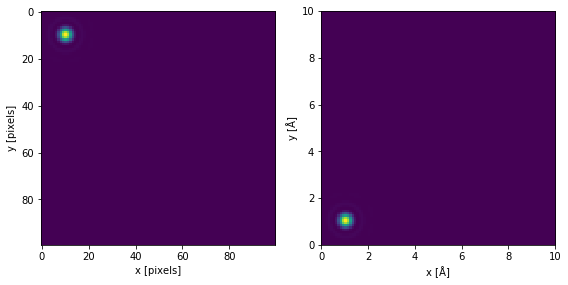

In [11]:
probe = ProbeWaves(extent = 10, sampling = .1, energy = 200e3, cutoff=.03)

waves = probe.build_at([(1,1)]) # build probe at (1,1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.imshow(waves.get_image().array.T)
ax1.set_xlabel('x [pixels]')
ax1.set_ylabel('y [pixels]')

ax2.imshow(waves.get_image().array.T, extent=[0, waves.extent[0], 0, waves.extent[1]], origin='lower')
ax2.set_xlabel('x [Å]')
ax2.set_ylabel('y [Å]')

plt.tight_layout()